### Enunciado de mini proyecto

Utilizando el método del gradiente descendente (método de Cauchy) se le pide que encuentre el punto donde se minimice el error establecido por la función descrita a continuación:

__Grupo 5__

Aplicando una iteración del método del gradiente para:

$$ Min: ln( x^2 + y^2 ), donde P_0 = (3, 4)$$

Concluya y justifique: ¿Qué puede concluir con los resultados obtenidos? ¿Cómo interpretan una posible solución al error mínimo?

### Analisis matématico de la función

Como introducción a la resolución de este problema, tenemos que tener en cuenta que es un logaritmo y wn particular un logaritmo natural, para poder entender como tener una solución aproximada adecuada.

Un logaritmo es un número real positivo *n* con una base *b* y un resultado *x*, del cual se dice que debemos elevar *b* al exponente *x* para obtener *n*:

$$ log_b (n) = x \therefore b^x = n $$

El Logaritmo natural es un logaritmo con base en el número *e*, este es un irracional aproximado a a 2.718282, que al igual que otros número irracionales puede tener una cantidad infinita de decimales:

$$ ln_{e} (n) x \therefore e^x = n $$

Una de las aplicaciones más conocidas de *e* es encontrar el área bajo la curva de la función 1/x

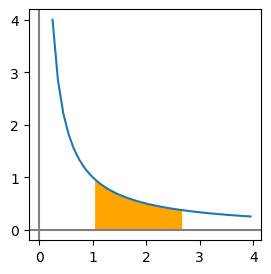

In [4]:
from math import e
from matplotlib import pyplot
from numpy import arange

def uno_sobre_x(x):
    return 1/x


eje_x = arange(0.25 , 4, 0.1)
eje_y = uno_sobre_x(eje_x)

plot_uno_sobre_x = pyplot.figure(figsize=(3,3),) 
pyplot.plot(eje_x, eje_y)
pyplot.fill_between(eje_x, eje_y, where= (eje_x >= 1) & (eje_x <= e), color="orange" )
pyplot.axvline(0, color="gray")
pyplot.axhline(0, color="gray")
pyplot.show()

Sabemos que para cualquier número real si este es elevado a la cero, nos da uno, por lo tanto:

$$ e^0 = 1 $$

Por lo cual los logaritmos naturales del interválos entre ]0, 1[, son negativos:

$$ e^{-0.5} = \frac{1}{e^{0.5}} \approx 0.60653 $$

Y por lo tanto el logaritmo natural no está definido para  0 ó número negativos, ya que no podemos obtener negativos de elevar o cero de elevar un real positivo a cualquier potencia.

### Método de descenso del gradiente

Sabemos de las clases teóricas que si tenemos una función multivariable, su gradiente es la suma de las derivadas parciales en los componentes respectivos, por ejemplo para una función de dos variables independientes:

$$ ∇𝑓 = 𝑓_x (𝑥, 𝑦)𝑖̂+ 𝑓_y(𝑥, 𝑦)𝑗̂= {𝜕𝑓 \over 𝜕𝑥 𝑖̂} + {𝜕𝑓 \over 𝜕𝑦 𝑗̂} $$

Dado que las derivadas representan la pendiente de una función y la gradiente es la suma de estos componentes, el vector resultante no puede brindar la dirección hacia donde se dirige un máximo local de una función, así mismo, para localizar el mínimo local de una función podemos ocupar el negativo de la gradiente.

Por tanto podemos movernos en el gradiente negativo de una función, partiendo de un punto x0, nuestro nuevo punto x1 sería:

$$ x1 = x0 - \alpha ∇𝑓(x_0) $$

Para obtener un Alpha optimizado podemos ocupar la siguiente función:

$$ g( \alpha ) = f( p_0 + \alpha d_0) $$

Luego podemos encontrar el alpha con la primera derivada respecto a alpha:

$$ g( \alpha ) = 0 $$

### Calculando para nuestro problema

Vamos a hacer una solución para el problema sin gráfico, para luego ver a que nos enfrentamos:

Primero encontramos nuestro primer punto al cual llamaremos d_0 (utilizamos aquí directamente un alpha optimizado):

$$ d_0 = - ∇𝑓(x_0) $$

Encontramos las primeras derivadas parciales de nuestra función

$$ f(x, y) = ln(x^2 + y^2 );	\to F_x = \frac{2x}{x^2 + y^2}, F_y = \frac{2y}{x^2 + y^2}  $$

Calculamos nuestro primer punto:

$$ d_0 = -∇𝑓(P_0) = \left( \frac{-2(3)}{3^2 + 4^2}, \frac{-2(4)}{3^2 + 4^2} \right) = \left( - \frac{6}{25}, - \frac{8}{25} \right)  $$

Ahora podemos calcular nuestro alpha:

$$ g( \alpha ) = f( p_0 + \alpha d_0)  = ln \left[ \left( 3 - \frac{6}{25} \alpha \right)^2 + \left( 4 - \frac{8}{25} \alpha \right)^2 \right]$$

Operando obtenemos

$$ g( \alpha ) = ln \left( 25 - 4 \alpha + \frac{4}{25} \alpha^2 \right) $$

Y su primera derivada:

$$ g' ( \alpha ) = \frac{ \frac{8}{25} \alpha - 4  }{25 - 4 \alpha + \frac{4}{25} \alpha^2} $$

Simplificando y reduciendo tenemos que nuestro alpha optimizado es:

$$ \alpha = 12.5 $$

Con esto podemos tener nuestra primera iteración del algoritmo del gradiente descendiente:

$$ p_1 = p_0 - \alpha \nabla f(d_0) = (3, 4) - 12.5 \left( \frac{6}{25} , \frac{8}{25} \right) = (3, 4) - (3, 4) = (0,0)$$

Evaluamos el punto en la función original:

$$ ln(0^2 + 0^0) = ln(0) = no \; \; definido $$



Es decir que bajo el procedimiento normal de la gradiente en descenso obtenemos indefinición del punto evaluado, entonces necesitamos entender por que. Para ello ploteamos nuestro grafico:

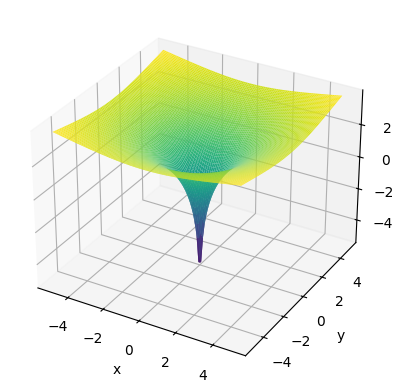

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def f_de_x_y(x, y):
    return np.log(x**2 + y**2)

eje_x = np.linspace(-5, 5,100)
eje_y = np.linspace(-5, 5, 100)

X, Y =  np.meshgrid(eje_x, eje_y)
Z = f_de_x_y(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Observamos algo claro:

$$  \lim_{x\to 0 } ln(x^2 + y^2 )  = - \infty $$

En este punto podemos concluir que este método está diseñado para encontrar mínimos locales (o globales, si se aplica en un punto adecuado) y que para el caso de la función que *no tiene un mínimo ni local ni absoluto* el método falla.

Podemos dar una solución ~"aproximada"~ que pueda servir para algunas aplicaciones en particual, esto podría ser aplicando un pequeño cambio al Po, a d0 o incluso a nuestro alpha. Para nuestro caso vamos cambiar en un 1E-5 el d0 y tenemos:

$$ d_{0a} = (3 - 0.00001, 4 - 0.00001) = (2.99999, 3.99999) $$

$$ p_{1a} = p_0 - \alpha \nabla f(d_{0a}) =  = (3, 4) - (2.99999, 3.99999) = (0.00001,0.00001)  $$

Y aplicado a nuestra función:

$$ ln(x^2 + y^2) = ln(0.00001^2 + 0.00001^2) \approx -22.33270375  $$

Esto nos brinda una aproximación hacia donde se dirije la gradiente, pero en realidad no nos da algo ni cercano al menos infinito, dependerá de la aplicación a usar si se puede tomar como solución.

Ahora pasamos a la demostración por software:

In [8]:
from math import log as ln

def f(x, y):
    """
    Nuestra función original en python
    """
    return ln(x**2 + y**2)

def f_x(x, y):
    """
    Derivada parcial respecto a x
    """
    return (2*x) / (x**2 + y**2)

def f_y(x, y):
    """
    Derivada parcial respecto a x
    """
    return (2*y) / (x**2 + y**2)


def gradiente_descenso(
        funcion:callable, 
        derivada_x,
        derivada_y,
        x0:float, 
        y0:float, 
        alpha:float, 
        iteraciones:int=10, 
        error_tolerado:float= 0.00001
          )->float:
    """
    función de gradiente descendiente para varias variables, aunque se 
    asume se se proporciona una lista con el mismo número de variables que 
    la función.
    """
    
    x1 = x0 - alpha * derivada_x(x0, y0)
    y1 = y0 - alpha * derivada_y(x0, y0)

    result_1 = funcion(x0, y0)
    result_2 = funcion(x1, y1)

    if abs(result_1 - result_2) <= error_tolerado:
        print(f"El punto ({x0}, {y0}) es un mínimo.")
        return True
    elif iteraciones == 1:
        print(f"El punto ({x0}, {y0}) no es un mínimo.")
        print("Se alcanzo el máximo de iteraciones")
        return False
    else:
        print(f"El punto ({x0}, {y0}) no es un mínimo.")
        return gradiente_descenso(
            funcion=funcion,
            derivada_x=derivada_x,
            derivada_y=derivada_y,
            x0=x1,
            y0=y1,
            alpha=alpha,
            iteraciones=iteraciones-1,
            error_tolerado=error_tolerado
        )


# Evaluando con el alpha vemos que se lanza una excepción ya que 
# no existe el ln de cero
gradiente_descenso(
    funcion=f,
    derivada_x=f_x,
    derivada_y=f_y,
    x0=3,
    y0=4,
    alpha=12.5,
    iteraciones=1
)

ValueError: math domain error

### Concluciones

¿Qué podemos  concluir con los resultados obtenidos?: El método del gradiente en descenso es una herramienta útil para encontrar mínimos locales, pero tanto el uso del alpha (índice de aprendizaje o tamaño de paso.), la cantidad de iteraciones y principalmente la función en la que se ocupa debe ser tomada con cuidad y sus resultados interpretados acorde a cada función con un criterio matemático, geométrico análitico y sobre todo de datos, que este bien cimentado.

¿Cómo interpretan una posible solución al error mínimo? Se pueden tener aplicaciones en la cuales este error no sea tomado en cuenta, pero dependerá concretamente del campo de conocimiento y aplicación en particular, en general para funciones sin mínimos locales el método no aplica.